In [2]:
# Lecture 3: Basic Monte Carlo

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Example: Calculate the area of a circle.

Area= 12.5856 pi= 3.1464


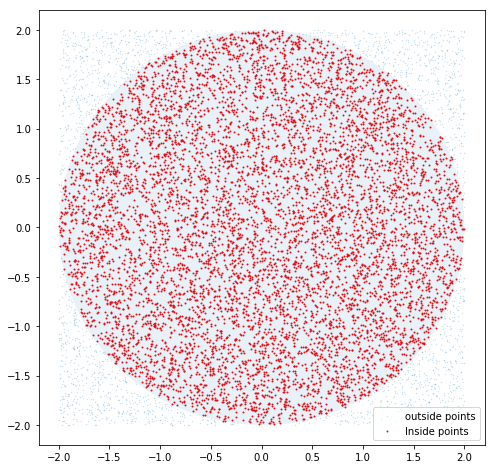

In [3]:
plt.figure(figsize=(8,8))  # set the figure size

# Calculate the radius of cirlce with radius 

radius = 2

N= 10000  #Use 10000 points 
X = np.random.uniform(low=-radius, high=radius, size=N)  # Random numbers from -1 to 1
Y = np.random.uniform(low=-radius, high=radius, size=N)   

plt.scatter(X,Y, s=.1, alpha=0.3, label=u'outside points')  

# drawing a circle 
crc=plt.Circle([0,0], radius = radius, alpha=0.1)
fig = plt.gcf()
fig.gca().add_artist(crc)

# calculate the distance from the center 
R = np.sqrt(X**2+Y**2);  
plt.scatter(X[R<radius],Y[R<radius], c='r', s=1, alpha=0.9, label=u'Inside points')

Abox =(2.0*radius)**2      # This is the big box 
Ninside= 0    
Noutside = 0

for i in np.arange(0,N):
    if R[i]<=1:
        Ninside =Ninside+1
    else:
        Noutside = Noutside+1
        
# Alternative and faster 
Ninside=np.sum(R<radius)
Area = Abox*Ninside/N
plt.legend()
#Area = Abox * Ninside/(Noutside+Ninside)
print ("Area=", Area, "pi=", Area/radius**2)

In [6]:
# 3. Monte Carlo inegration

In [4]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

In [5]:
a = 2;    
b = 3; 

# use N draws 
N= 10000

X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
Y =f(X)   # CALCULATE THE f(x) 

Imc= (b-a) * np.sum(Y)/ N;

exactval=intf(b)-intf(a)

print ("Monte Carlo estimation=",Imc, "Exact number=", intf(b)-intf(a))

Monte Carlo estimation= 11.813543094762228 Exact number= 11.811358925098283


In [9]:
# Mutlidimensional integral

In [6]:
fmd = lambda x,y: x*x + y*y

In [7]:
# use N draws 
N= 8000
X= np.random.uniform(low=-1, high=1, size=N) 
Y= np.random.uniform(low=-1, high=1, size=N) 
Z=fmd(X, Y)   # CALCULATE THE f(x) 

R = X**2 + Y**2

N = np.sum(R<1)
sumsamples = np.sum(Z[R<1])

print ("I=",np.pi*1.0*1.0*sumsamples/N, "actual", np.pi/2.0) #actual value (change to polar to calculate)

I= 1.585234675253952 actual 1.5707963267948966


In [13]:
# Monte-Carlo as a function of number of samples

Text(0,0.5,'sqrt((Imc-ExactValue)$^2$)')

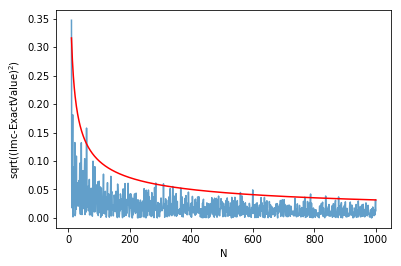

In [8]:
Imc=np.zeros(1000)
Na = np.linspace(0,1000,1000)

exactval= intf(b)-intf(a)

for N in np.arange(0,1000):
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[N]= (b-a) * np.sum(Y)/ N;
    
    
plt.plot(Na[10:],np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(Na[10:], 1/np.sqrt(Na[10:]), 'r')
plt.xlabel("N")
plt.ylabel("sqrt((Imc-ExactValue)$^2$)")

In [ ]:
# 4. Errors in MC

11.811530867249818 0.004124357064098467


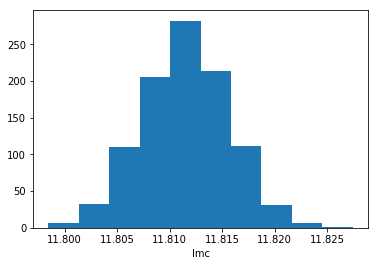

In [9]:
# multiple MC estimations
m=1000
N=10000
Imc=np.zeros(m)


for i in np.arange(0,m):
    
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[i]= (b-a) * np.sum(Y)/ N;
    
    
plt.hist(Imc)
plt.xlabel("Imc")
print (np.mean(Imc), np.std(Imc))

In [ ]:
# Example: Errors on a d-dimensional integral

In [10]:
g = lambda x: np.sum(x, axis=0)**2

def calculate_errors(N):
    nrepeats=100
    ndims=10
    intg = np.zeros(nrepeats)
    e=np.zeros(ndims)
    for d in range(ndims):
        for k in range(nrepeats):
            x=np.random.rand(d+1,N)
            y=g(x)
            intg[k]=np.mean(y)
        e[d] = np.std(intg)
    return e

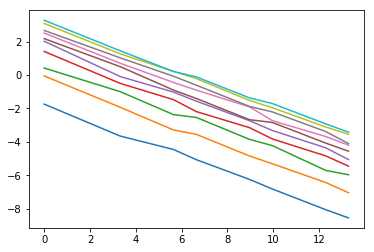

In [11]:
inputns=[1,10, 50, 100,500, 1000, 5000, 10000]
errors = np.array([calculate_errors(n) for n in inputns])

plt.figure()
for i in range(10):
    plt.plot(np.log2(inputns), np.log2(errors[:,i]))

In [ ]:
# 5. Importance Sampling

In [12]:
from scipy import stats
from scipy.stats import norm

mu = 2;
sig =.7;

f = lambda x: np.sin(x)*x
infun = lambda x: np.sin(x)-x*np.cos(x)
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

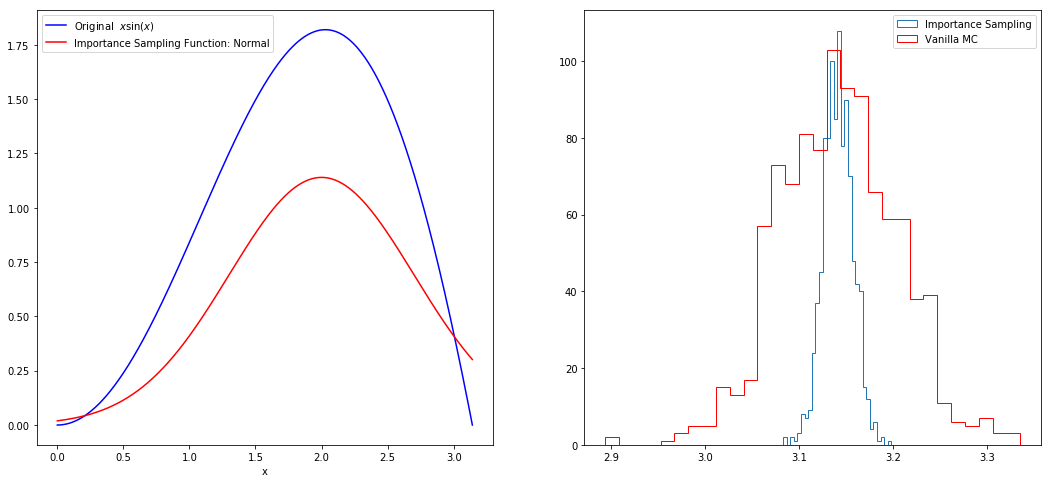

In [13]:
plt.figure(figsize=(18,8))  # set the figure size


# range of integration
xmax =np.pi 
xmin =0

# Number of draws 
N =1000

# Just want to plot the function
x=np.linspace(xmin, xmax, 1000)
plt.subplot(1,2,1)
plt.plot(x, f(x), 'b', label=u'Original  $x\sin(x)$')
plt.plot( x, 2*p(x), 'r', label=u'Importance Sampling Function: Normal')
plt.xlabel('x')
plt.legend()
# =============================================
# EXACT SOLUTION 
# =============================================
Iexact = infun(xmax)-infun(xmin)

# ============================================
# VANILLA MONTE CARLO 
# ============================================
Ivmc = np.zeros(1000)
for k in np.arange(0,1000):
    x = np.random.uniform(low=xmin, high=xmax, size=N)
    Ivmc[k] = (xmax-xmin)*np.mean( f(x))


# ============================================
# IMPORTANCE SAMPLING 
# ============================================
# CHOOSE Gaussian so it similar to the original functions

Iis = np.zeros(1000)
for k in np.arange(0,1000):
    # DRAW FROM THE GAUSSIAN mean =2 std = sqrt(0.4) 
    xis = mu + sig*np.random.randn(N,1);
    #hist(x)
    xis = xis[ (xis<xmax) & (xis>xmin)] ;

    # normalization for gaussian from 0..pi
    normal = normfun(np.pi)-normfun(0);


    Iis[k] =np.mean(f(xis)/p(xis))*normal;


plt.subplot(1,2,2)
plt.hist(Iis,30, histtype='step', label=u'Importance Sampling');
plt.hist(Ivmc, 30, color='r',histtype='step', label=u'Vanilla MC');

 
plt.legend()

In [ ]:
# 6. Rejection Method

100034 10000


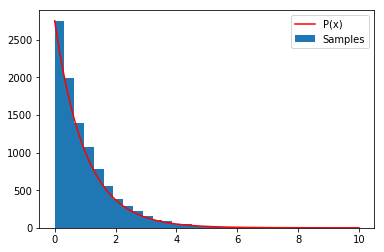

In [16]:
%matplotlib inline

P = lambda x: np.exp(-x)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limit (supremum) for y
ymax = 1

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # pick a uniform number on [xmin, xmax) (e.g. 0...10)
    x = np.random.uniform(xmin, xmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # Do the accept/reject comparison
    if y < P(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
print (count, accepted)

# get the histogram info
hinfo = np.histogram(samples,30)

# plot the histogram
plt.hist(samples,bins=30, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*P(xvals), 'r', label=u'P(x)')

# turn on the legend
plt.legend()

23940 10000


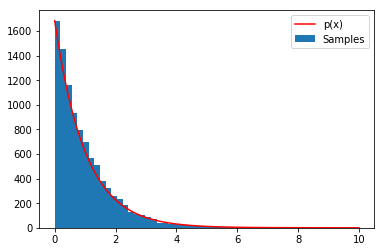

In [18]:
%matplotlib inline

p = lambda x: np.exp(-x)  # our distribution
g = lambda x: 1/(x+1)  # our proposal pdf (we're thus choosing M to be 1)
invCDFg = lambda x: np.log(x +1) # generates our proposal using inverse sampling

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limits for inverse sampling
umin = invCDFg(xmin)
umax = invCDFg(xmax)

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # Sample from g using inverse sampling
    u = np.random.uniform(umin, umax)
    xproposal = np.exp(u) - 1
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < p(xproposal)/g(xproposal):
        samples[accepted] = xproposal
        accepted += 1
    
    count +=1
    
print (count, accepted)

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')

# turn on the legend
plt.legend()

In [ ]:
# 7. Inverse Transform

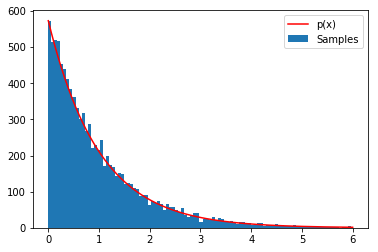

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# probability distribution we're trying to calculate
p = lambda x: np.exp(-x)

# CDF of p
CDF = lambda x: 1-np.exp(-x)

# invert the CDF
invCDF = lambda x: -np.log(1-x)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 6 # the upper limit of our domain

# range limits
rmin = CDF(xmin)
rmax = CDF(xmax)

N = 10000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.uniform(rmin, rmax, N)
X = invCDF(R)

# get the histogram info
hinfo = np.histogram(X,100)

# plot the histogram
plt.hist(X,bins=100, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')

# turn on the legend
plt.legend()

In [18]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-3.html